In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
file_path = r'/content/heart_failure_clinical_records_dataset.csv'
dataset = pd.read_csv(file_path)

In [4]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


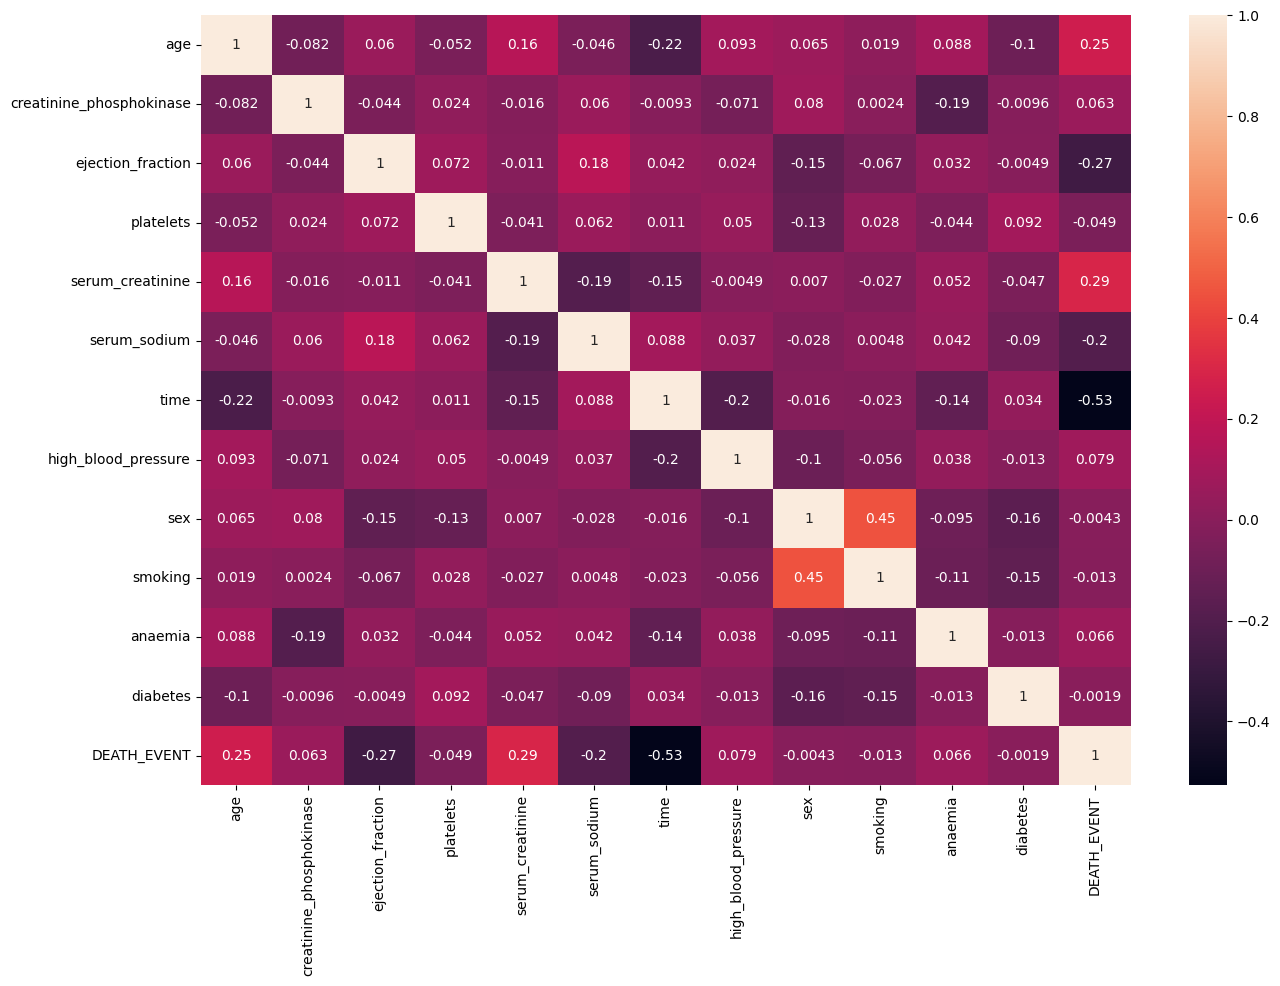

In [ ]:
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
dataset1 = pd.read_csv(file_path)
std = StandardScaler()
model = ExtraTreesClassifier()
target_col = ["DEATH_EVENT"]
num_cols = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets" , "serum_creatinine", "serum_sodium" , "time"]
bin_cols = ["high_blood_pressure", "sex", "smoking", "anaemia", "diabetes"]
scaled = std.fit_transform(dataset1[num_cols])     # Standardize the columns to get them on the same scale
scaled = pd.DataFrame(scaled, columns=num_cols)

df_train1 = pd.concat([scaled, dataset1[bin_cols + target_col]], axis=1)


plt.figure(figsize=(15,10))
sns.heatmap(df_train1.corr(), annot=True, fmt='.2g');

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
dataset3 = pd.read_csv(file_path)
d1 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['anaemia'] == 1)]
d2 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['anaemia'] == 1)]
d3 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['anaemia'] == 0)]
d4 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['anaemia'] == 0)]


lab2 = ['No Anaemia - Survived','No Anaemia - Died', 'Anaemia - Survived', 'Anaemia - Died']
val2 = [len(d1),len(d2),len(d3),len(d4)]


#Create Subplots
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=lab2, values=val2, name = 'Anaemia v/s Death'), 1,1)

fig.update_traces(hole = .4, hoverinfo = 'label+percent')

fig.update_layout(
    title_text = ' Anaemia v/s Death',
    annotations = [dict(text = 'Anaemia v/s Death', x = 0.15, y = 0.5, font_size=9, showarrow=False )],
    autosize = False, width=900, height = 500, paper_bgcolor = 'white')

fig.show()

In [ ]:

d1 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['diabetes'] == 1)]
d2 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['diabetes'] == 1)]
d3 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['diabetes'] == 0)]
d4 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['diabetes'] == 0)]


lab2 = ['No diabetes - Survived','No diabetes - Died', 'diabetes - Survived', 'diabetes - Died']
val2 = [len(d1),len(d2),len(d3),len(d4)]


#Create Subplots
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=lab2, values=val2, name = 'diabetes v/s Death'), 1,1)

fig.update_traces(hole = .4, hoverinfo = 'label+percent')

fig.update_layout(
    title_text = ' Diabetes v/s Death',
    annotations = [dict(text = 'diabetes v/s Death', x = 0.15, y = 0.5, font_size=9, showarrow=False )],
    autosize = False, width=900, height = 500, paper_bgcolor = 'white')

fig.show()

In [ ]:
d1 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['smoking'] == 1)]
d2 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['smoking'] == 1)]
d3 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['smoking'] == 0)]
d4 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['smoking'] == 0)]


lab2 = ['No smoking - Survived','No smoking - Died', 'smoking - Survived', 'smoking - Died']
val2 = [len(d1),len(d2),len(d3),len(d4)]


#Create Subplots
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=lab2, values=val2, name = 'smoking v/s Death'), 1,1)

fig.update_traces(hole = .4, hoverinfo = 'label+percent')

fig.update_layout(
    title_text = ' Smoking v/s Death',
    annotations = [dict(text = 'smoking v/s Death', x = 0.15, y = 0.5, font_size=9, showarrow=False )],
    autosize = False, width=900, height = 500, paper_bgcolor = 'white')

fig.show()

In [ ]:
d1 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['high_blood_pressure'] == 1)]
d2 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['high_blood_pressure'] == 1)]
d3 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['high_blood_pressure'] == 0)]
d4 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['high_blood_pressure'] == 0)]


lab2 = ['No high_blood_pressure - Survived','No high_blood_pressure - Died', 'high_blood_pressure - Survived', 'high_blood_pressure - Died']
val2 = [len(d1),len(d2),len(d3),len(d4)]


#Create Subplots
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=lab2, values=val2, name = 'high_blood_pressure v/s Death'), 1,1)

fig.update_traces(hole = .4, hoverinfo = 'label+percent')

fig.update_layout(
    title_text = ' High_blood_pressure v/s Death',
    annotations = [dict(text = 'high_blood_pressure v/s Death', x = 0.11, y = 0.5, font_size=9, showarrow=False )],
    autosize = False, width=900, height = 500, paper_bgcolor = 'white')

fig.show()

In [ ]:
d1 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['sex'] == 1)]
d2 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['sex'] == 1)]
d3 = dataset3[(dataset3["DEATH_EVENT"] == 0) & (dataset3['sex'] == 0)]
d4 = dataset3[(dataset3["DEATH_EVENT"] == 1) & (dataset3['sex'] == 0)]


lab2 = ['female - Survived','female - Died', 'male - Survived', 'male - Died']
val2 = [len(d1),len(d2),len(d3),len(d4)]


#Create Subplots
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=lab2, values=val2, name = 'sex v/s Death'), 1,1)

fig.update_traces(hole = .4, hoverinfo = 'label+percent')

fig.update_layout(
    title_text = ' Sex v/s Death',
    annotations = [dict(text = 'sex v/s Death', x = 0.16, y = 0.5, font_size=9, showarrow=False )],
    autosize = False, width=900, height = 500, paper_bgcolor = 'white')

fig.show()

In [ ]:
# iterate over each column and check for missing values
# For numerical values, handle their value as the mean of the column
# For column contains dichotomous variables, filling it with the most frequent number, this number either could be 1 or 0
for (columnName, columnData) in dataset.items():
    if dataset[columnName].dtype == 'int64' or dataset[columnName].dtype == 'float64' and dataset[columnName].dtype != '1' and dataset[columnName].dtype != '0':
        column_mean = dataset[columnName].mean()
        column_mean = int(column_mean) if dataset[columnName].dtype == 'int64' else column_mean
        # fill missing values with the mean of the column
        dataset[columnName].fillna(column_mean, inplace=True)
    else:
        column_mode = dataset[columnName].mode()[0]
        # fill missing and NaN values with the mode of the column
        dataset[columnName].fillna(column_mode, inplace=True)
#convert the column that contains  dichotomous variables columns to one hot encoding
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for feature in binary_features:
    # using drop_first to avoid redundant
    onehot_encoded = pd.get_dummies(dataset[feature], prefix=feature, drop_first=True)
    # combine the new dataset of onehot encoded
    dataset = pd.concat([dataset, onehot_encoded], axis=1)
    # delete the original column
    dataset.drop(columns=[feature], inplace=True)

In [ ]:
dataset.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,False,False,True,True,False
1,55.0,7861,38,263358.03,1.1,136,6,1,False,False,False,True,False
2,65.0,146,20,162000.00,1.3,129,7,1,False,False,False,True,True
3,50.0,111,20,210000.00,1.9,137,7,1,True,False,False,True,False
4,65.0,160,20,327000.00,2.7,116,8,1,True,True,False,False,False


For random Forest

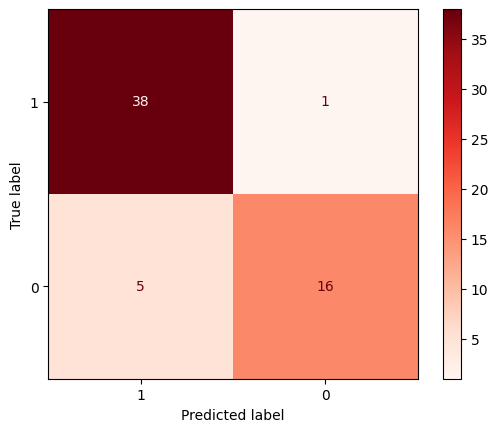

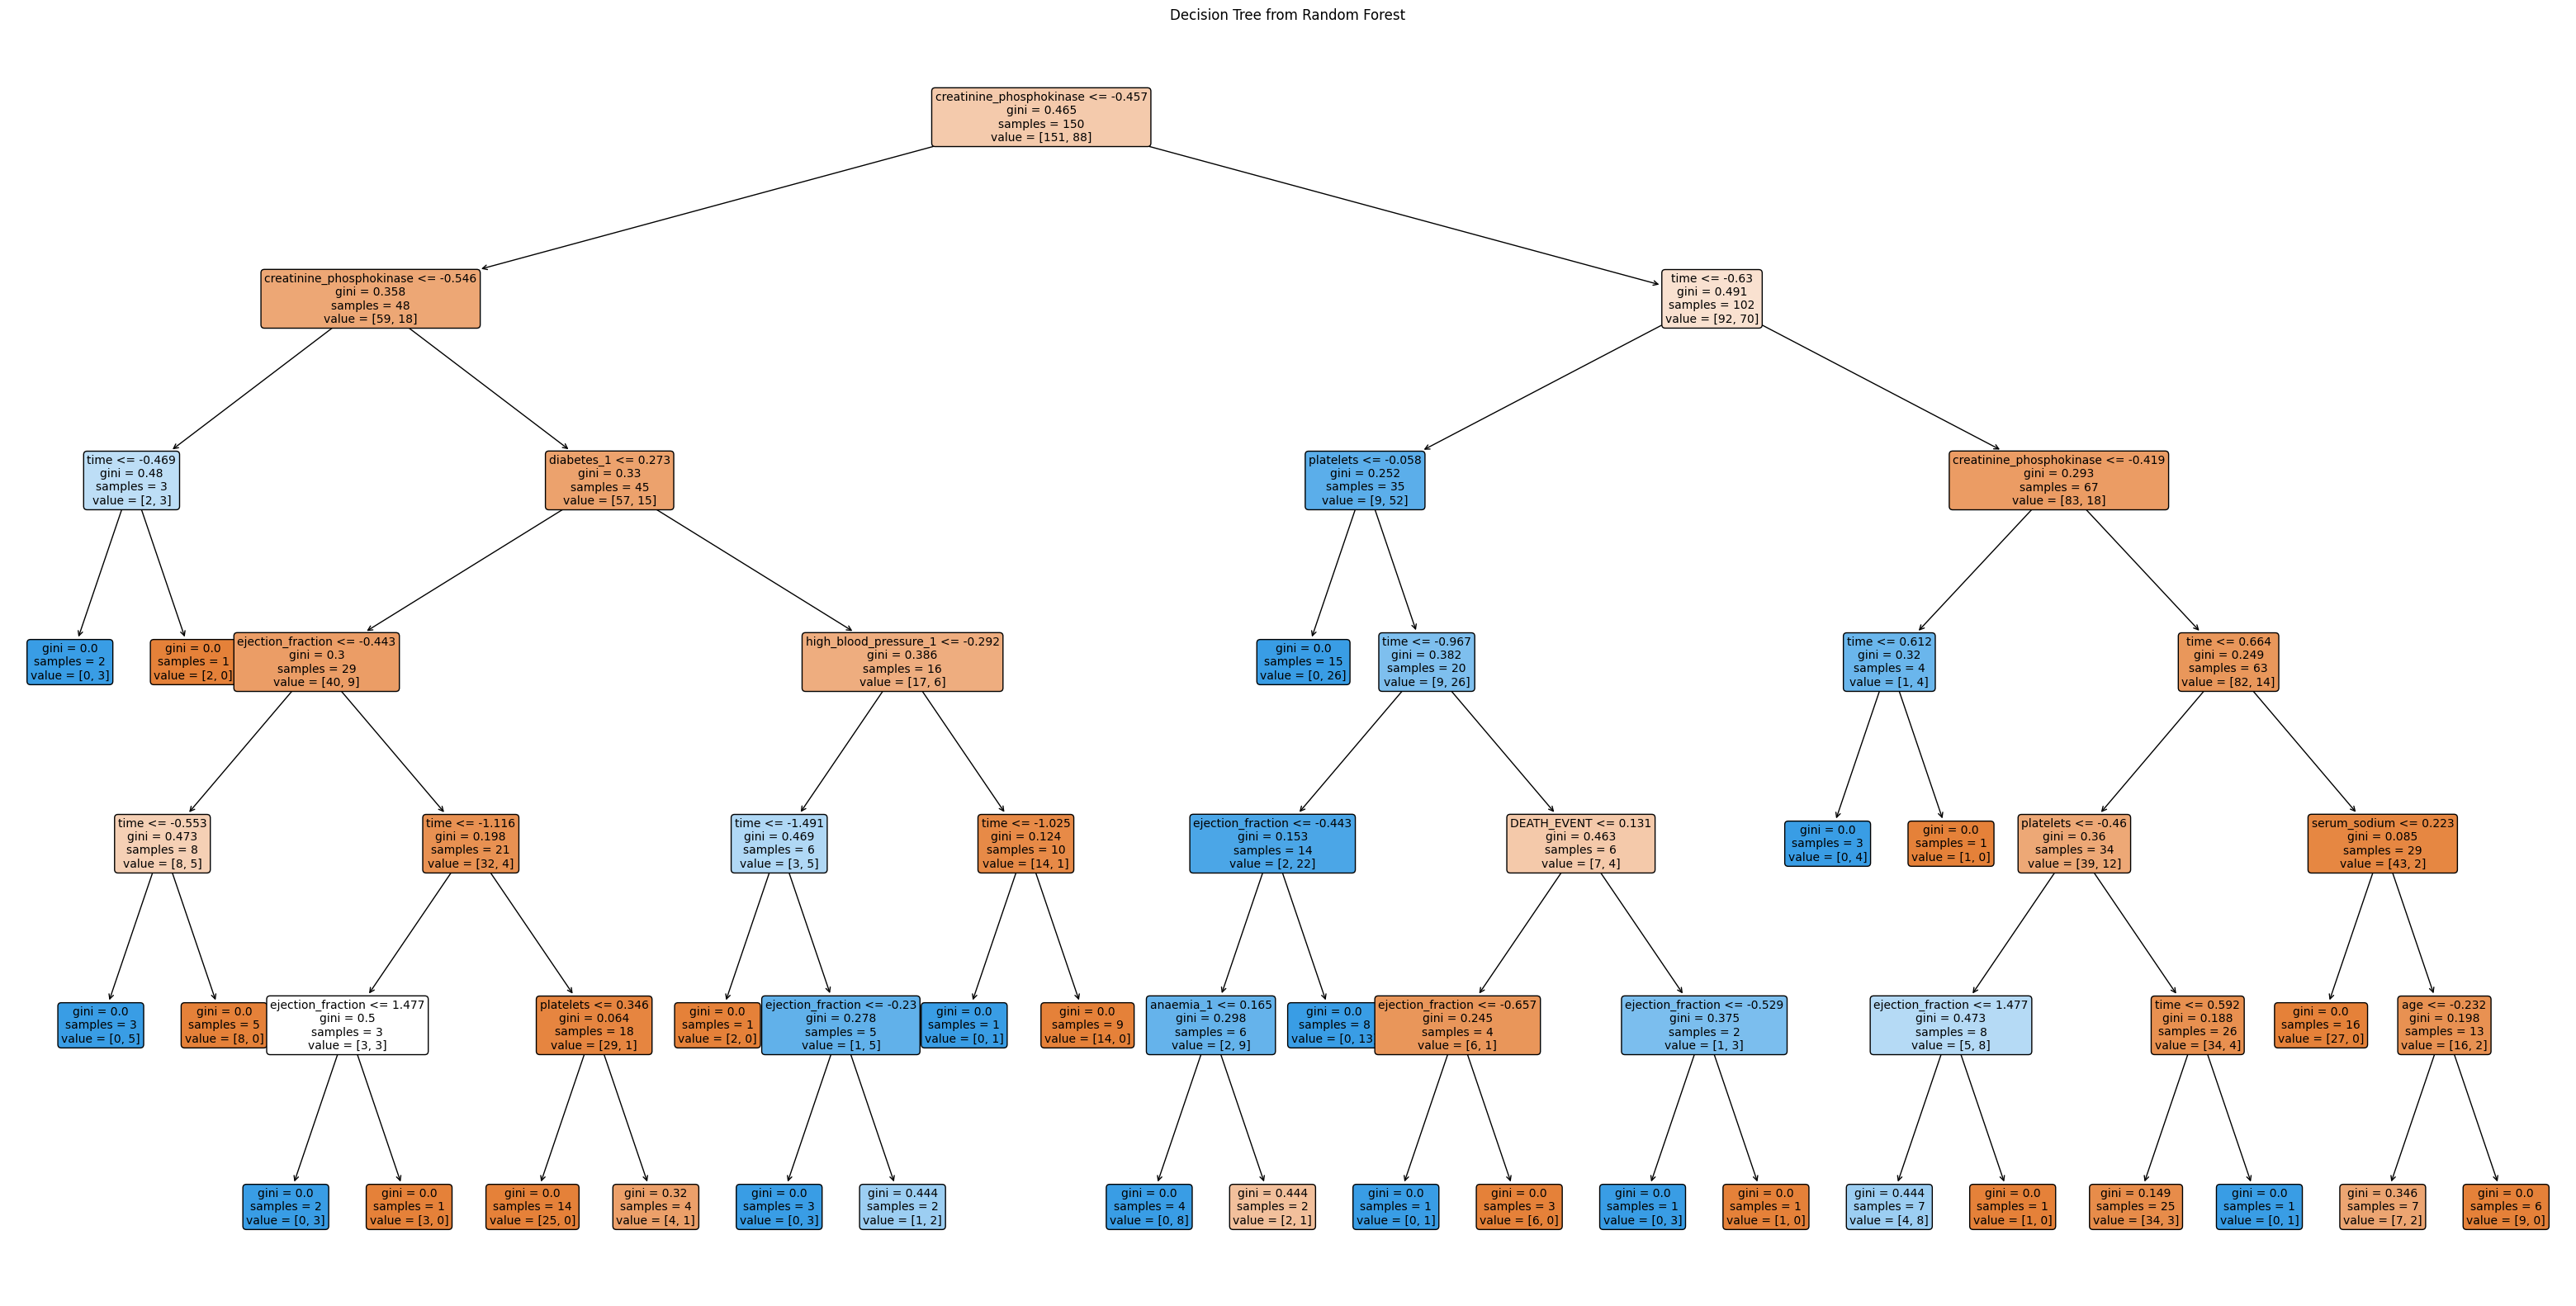

Accuracy: 0.9
Precision: 0.9124487004103967
Recall: 0.8681318681318682
F1 Score: 0.8844672657252888


In [ ]:
def random_forest():
    #select the column of DEATH_EVENT, which is the objective column
    #splitting the dataset into the training set and test set
    x = dataset.drop(dataset.columns[7], axis=1)
    y = dataset.iloc[:, 7]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
    #feature scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    #logistic regression to the training set
    classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, random_state=50,oob_score = True)
    classifier.fit(x_train, y_train)
    #output the result using confusion matrix
    y_pred = classifier.predict(x_test) #a prediction of result
    confusion_matrix_randomforest = confusion_matrix(y_test, y_pred)
    classes= dataset.DEATH_EVENT.unique()
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_randomforest, display_labels=classes)
    disp.plot(cmap=plt.cm.Reds, values_format='g')
    plt.show()
    #True positives, true negatives, False Positives(type I mistake), False Negatives(type II mistake)
    accuracy = accuracy_score(y_test, y_pred) #(TP+TN)/(TP+TN+FP+FN)
    precision = precision_score(y_test, y_pred, average='macro')#(TP/(TP+FP))
    recall = recall_score(y_test, y_pred, average='macro')#（TP/（TP+FN))
    f1 = f1_score(y_test, y_pred, average='macro')# 2*(precision*Recall/(Precision+recall))
    tree_to_plot = classifier.estimators_[0]

    # Plot the decision tree
    plt.figure(figsize=(40, 20))
    plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree from Random Forest")
    plt.show()
    #return the accuracy, precision, recall , f1 and out-of-bag scores
    return(accuracy, precision, recall,f1, classifier.oob_score_ )

[random_forest_accuracy_score,random_forest_precision_score,random_forest_recall_score,random_forest_f1_score,random_forest_oob_score] = random_forest()

print(f"Accuracy: {random_forest_accuracy_score}")
print(f"Precision: {random_forest_precision_score}")
print(f"Recall: {random_forest_recall_score}")
print(f"F1 Score: {random_forest_f1_score}")

KNN model

In [ ]:
#apply KNN algorithm
X = dataset.drop('DEATH_EVENT', axis = 1)
y = dataset['DEATH_EVENT']

#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#split the data to put aside 20% for testing purpose with random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

test_scores = []
train_scores = []

#iterate different k value to evaluate the KNN model
for i in range(1,25):
    # initialize the knn model
    knn = KNeighborsClassifier(i)
    #training the model
    knn.fit(X_train, y_train)
    #evaluate the performance
    train_scores.append(knn.score(X_train,y_train)) # knn.score(X_train,y_train) computes and returns the training accuracy
    test_scores.append(knn.score(X_test,y_test)) # knn.score(X_test,y_test) computes and returns the testing accuracy

In [ ]:
#find the max train score
max_train_score = np.max(train_scores)

#find the index of max train score
train_score_index = []
for index, score in enumerate(train_scores):
    if score == max_train_score:
        train_score_index.append(index)

#transfer index into k value
k_values_train = [index + 1 for index in train_score_index] #since index starts from 0, we need to +1 to find the correct k_value

print('Max Train Score: {:.2f}%'.format(max_train_score * 100)) #transfer the max training score into %
print('k values for Max Train Score:', k_values_train)

Max Train Score: 100.00%
k values for Max Train Score: [1]


In [ ]:
#find the max test score
max_test_score = np.max(test_scores)

#find the index of max test score
test_score_index = []
for index, score in enumerate(test_scores):
    if score == max_test_score:
        test_score_index.append(index)

#transfer index into k value
k_values_test = [index + 1 for index in test_score_index]

print('Max Test Score: {:.4f}%'.format(max_test_score * 100))
print('k values for Max Test Score:', k_values_test)

Max Test Score: 75.0000%
k values for Max Test Score: [7, 9, 15, 17]


<Axes: >

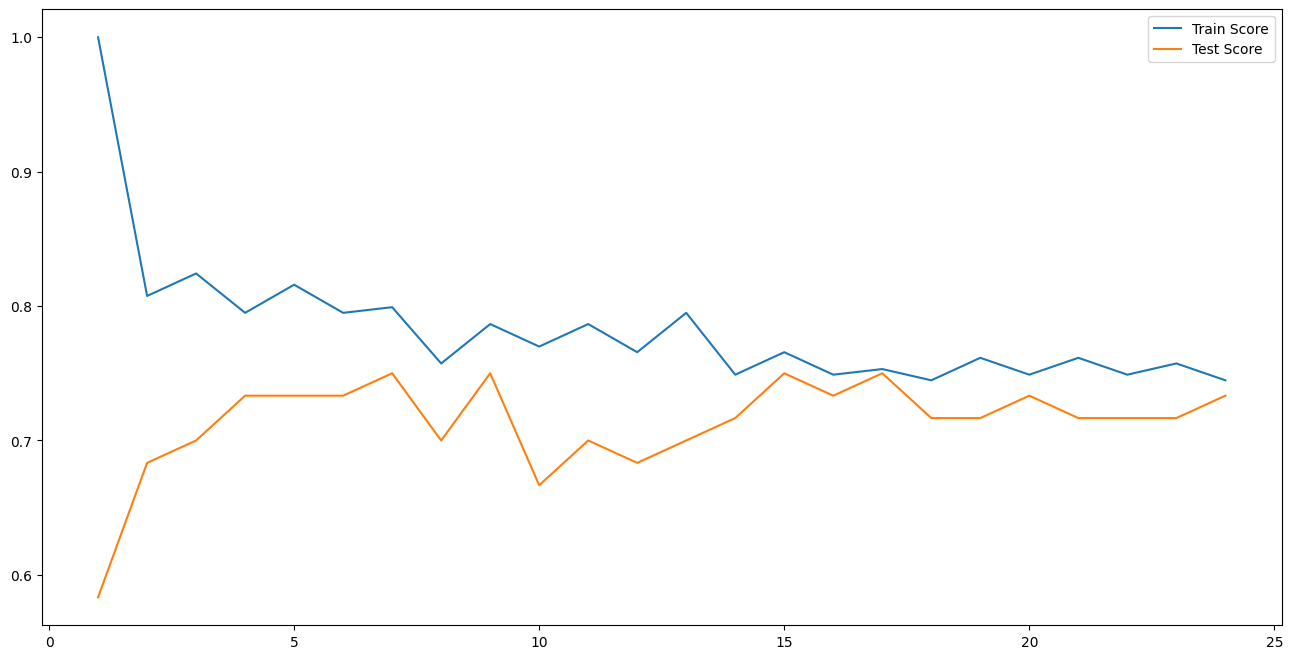

In [ ]:
# plot the result
plt.figure(figsize=(16, 8))
sns.lineplot(x=range(1, 25), y=train_scores, label='Train Score')
sns.lineplot(x=range(1, 25), y=test_scores, label='Test Score')

Accuracy: 75.0
Accuracy Score:               : 0.7500
KNN f1-score  : 0.5455
KNN precision : 0.4286
KNN recall    : 0.7500

               precision    recall  f1-score   support

           0       0.92      0.75      0.83        48
           1       0.43      0.75      0.55        12

    accuracy                           0.75        60
   macro avg       0.68      0.75      0.69        60
weighted avg       0.82      0.75      0.77        60



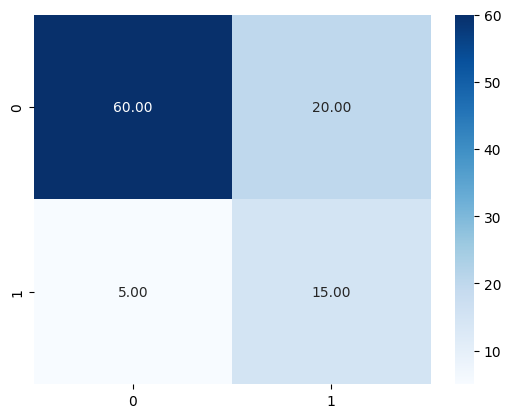

In [ ]:
#re-train the KNN model with the best K value:7
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred) * 100)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f",cmap='Blues')

print('Accuracy Score:               : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('KNN f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('KNN precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('KNN recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))



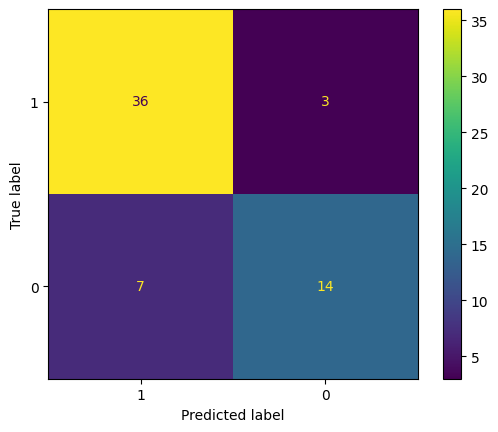

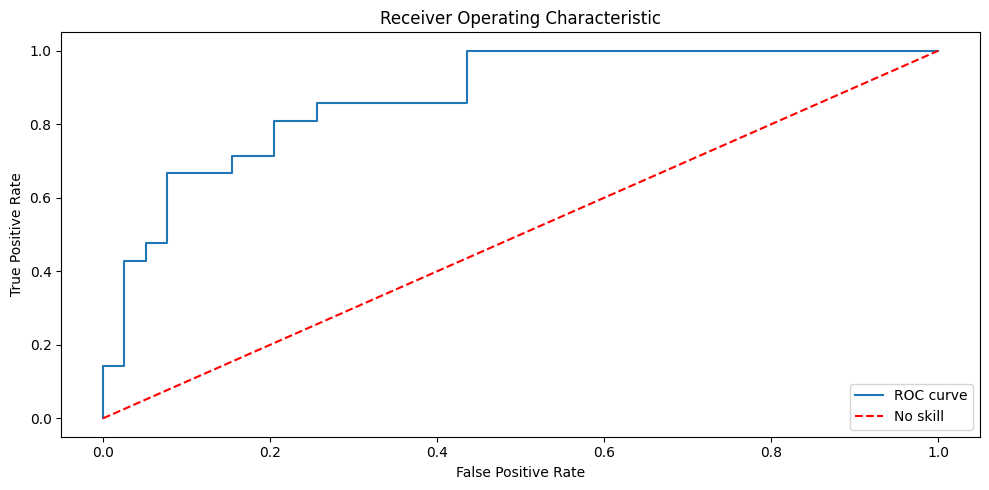

Accuracy: 0.8333333333333334
Precision: 0.8303693570451436
Recall: 0.7948717948717949
F1 Score: 0.8074454428754814


In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression():
    #select the column of DEATH_EVENT, which is the objective column
    #splitting the dataset into the training set and test set
    x = dataset.drop(dataset.columns[7], axis=1)
    y = dataset.iloc[:, 7]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
    #feature scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)


    # Logistic Regression on the training set
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)

    # Predicting the test set results
    y_pred = classifier.predict(x_test)

    # Output the result using confusion matrix
    confusion_matrix_logistic = confusion_matrix(y_test, y_pred)
    classes = dataset.DEATH_EVENT.unique()
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_logistic, display_labels=classes)
    disp.plot()
    plt.show()



    # Predict probability estimates for the test dataset using the trained model
    y_pred_proba = classifier.predict_proba(x_test)[:, 1]  # Predicted probabilities used for ROC curve

    # Calculate the false positive rate and true positive rate at different thresholds for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label='ROC curve')  # Add a label for the ROC curve
    plt.plot([0, 1], [0, 1], 'r--', label='No skill')  # Add a label for the 'no-skill' classifier
    plt.title('Receiver Operating Characteristic')  # Set the title of the plot
    plt.xlabel('False Positive Rate')  # Set the x-axis label
    plt.ylabel('True Positive Rate')  # Set the y-axis label
    plt.legend(loc='lower right')  # The legend is now able to use the labels provided
    plt.tight_layout()  # Adjust the layout to ensure it fits well
    plt.show()  # Display the plot



    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # No need to plot the decision tree for logistic regression

    # Return the performance metrics
    return (accuracy, precision, recall, f1)

# Run the logistic regression function and print the out-of-bag score
[logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1] = logistic_regression()
print(f"Accuracy: {logistic_regression_accuracy}")
print(f"Precision: {logistic_regression_precision}")
print(f"Recall: {logistic_regression_recall}")
print(f"F1 Score: {logistic_regression_f1}")


In [ ]:
#select the column of DEATH_EVENT, which is the objective column
    #splitting the dataset into the training set and test set
x = dataset.drop(dataset.columns[7], axis=1)
y = dataset.iloc[:, 7]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

#feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
mlp_1_layer = MLPRegressor(hidden_layer_sizes=(32,64,32), activation='tanh', solver='adam', batch_size=20, max_iter=500,
                           learning_rate_init=0.01)
mlp_1_layer.fit(x_train, y_train)
Y_pred = mlp_1_layer.predict(x_test)
print(f"MLP(first) MSE={mean_squared_error(y_test, Y_pred)}, MAE={mean_absolute_error(y_test, Y_pred)}")

mlp_2_layers = MLPRegressor(hidden_layer_sizes=(32,64,32), activation='tanh', solver='adam', batch_size=20, max_iter=500,
                            learning_rate_init=0.01)
mlp_2_layers.fit(x_train, y_train)
Y_pred = mlp_2_layers.predict(x_test)
print(f"MLP(second) MSE={mean_squared_error(y_test, Y_pred)}, MAE={mean_absolute_error(y_test, Y_pred)}")






MLP(first) MSE=0.22658000131909764, MAE=0.35632711533360256
MLP(second) MSE=0.2076349751628088, MAE=0.32732570393253474


In [ ]:
mlp_2_layers = MLPRegressor(hidden_layer_sizes=(32,64,32), activation='relu', solver='adam', batch_size=20, max_iter=500,
                            learning_rate_init=0.001)
hyper_params = {
    "hidden_layer_sizes":[(50,),(100,),(150,)],
    "activation": ["tanh", "relu"],
    "learning_rate_init": [0.0001, 0.001, 0.01],
}
grid_search = GridSearchCV(estimator=mlp_2_layers, param_grid=hyper_params, cv=3)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

final_model = grid_search.best_estimator_
Y_pred = final_model.predict(x_test)
print(f"Final Model MSE={mean_squared_error(y_test, Y_pred)}, MAE={mean_absolute_error(y_test, Y_pred)}")

{'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0001}
Final Model MSE=0.13750786281915597, MAE=0.30293516080780575
